In [53]:
#Computational and Visualisation packages
library(rvest)
library(qdap)
library(SnowballC)
library(qdap)

# Suppress warnings
options(warn=-1)

In [54]:
donald_speech <- read_html('http://www.politico.com/story/2016/07/full-transcript-donald-trump-nomination-acceptance-speech-at-rnc-225974')
hillary_speech <- read_html('http://www.politico.com/story/2016/07/full-text-hillary-clintons-dnc-speech-226410')

donaldNode <- html_nodes(donald_speech, "style~ p")
hillaryNode <- html_nodes(hillary_speech, "style~ p")


## Preprocessing & Cleansing of the data

In [55]:
# -------- Donald Trump --------
donaldText <- html_text(donaldNode)
donaldText <- sub("Remarks as prepared for delivery according to a draft obtained by POLITICO Thursday afternoon.", '', donaldText)
donaldText <- sub("Story Continued Below", '', donaldText)

donaldText <- iconv(donaldText, "latin1", "ASCII", "")
donaldText <- paste(donaldText, collapse = c(" ", "\n"))

donaldPrep <- qprep(donaldText)
donaldPrep <- replace_contraction(donaldPrep)
donaldRm <- rm_stopwords(donaldPrep, Top100Words, separate = F)
donaldStrip <- strip(donaldRm, char.keep = c("?", "."))

keep <- c("United States", "Hillary Clinton", "Donald Trump", "middle class", "Supreme Court")
donaldFill <- data.frame(space_fill(donaldStrip, keep))
donaldFill$candidate <- "Trump"
colnames(donFill)[1] <- "text"


In [56]:
# -------- Hillary Clinton --------
hillaryText <- html_text(hillaryNode)
hillaryText <- sub("Hillary Clinton's speech at the Democratic National Convention, as prepared for delivery:", '', hillaryText)
hillaryText <- sub("Story Continued Below", '', hillaryText)

hillaryText <- iconv(hillaryText, "latin1", "ASCII", "")
hillaryText <- paste(hillaryText, collapse = c(" ", "\n"))

hillaryPrep <- qprep(hillaryText)
hillaryPrep <- replace_contraction(hillaryPrep)
hillaryRm <- rm_stopwords(hillaryPrep, Top100Words, separate = F)
hillaryStrip <- strip(hillaryRm, char.keep = c("?", "."))

hillaryFill <- data.frame(space_fill(hillaryStrip, keep))
hillaryFill$candidate <- "Clinton"
colnames(hillaryFill)[1] <- "text"


In [57]:
raw_frame <- rbind(donFill, hillFill)
processed_dataset <- sentSplit(raw_frame, "text")

In [58]:
print ("Structure of the dataset :")
print (str(processed_dataset))

[1] "Structure of the dataset :"
Classes ‘sent_split’, ‘qdap_df’, ‘sent_split_text_var:text’ and 'data.frame':	660 obs. of  3 variables:
 $ candidate: chr  "Trump" "Trump" "Trump" "Trump" ...
 $ tot      : chr  "1.1" "1.2" "1.3" "1.4" ...
 $ text     : chr  "friends delegates fellow americans humbly gratefully accept nomination presidency United~~States." "together lead our party back white house lead our country back safety prosperity peace." "country generosity warmth." "also country law order." ...
 - attr(*, "text.var")= chr "text"
 - attr(*, "qdap_df_text.var")= chr "text"
NULL


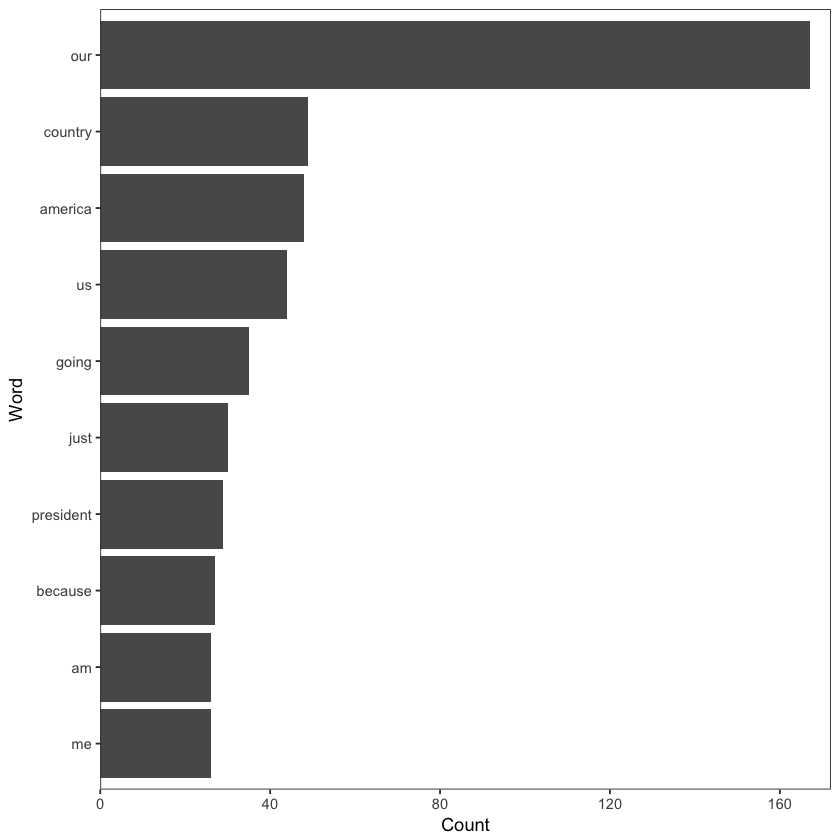

In [59]:
frequency <- freq_terms(processed_dataset$text)
plot(frequency[1:10,])

## Top 10 Frequency from each of the candidate speech

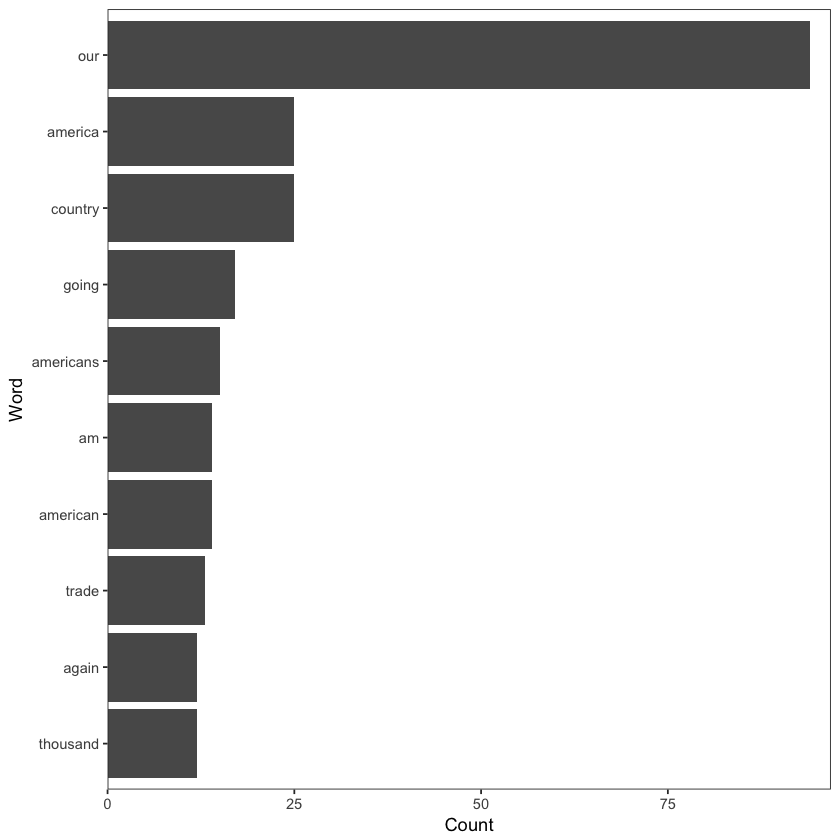

In [60]:
# Donald Trump

donaldFrequency <- processed_dataset[processed_dataset$candidate == "Trump", ]
donaldFrequency <- freq_terms(donaldFrequency$text)

plot(donaldFrequency[1:10,])

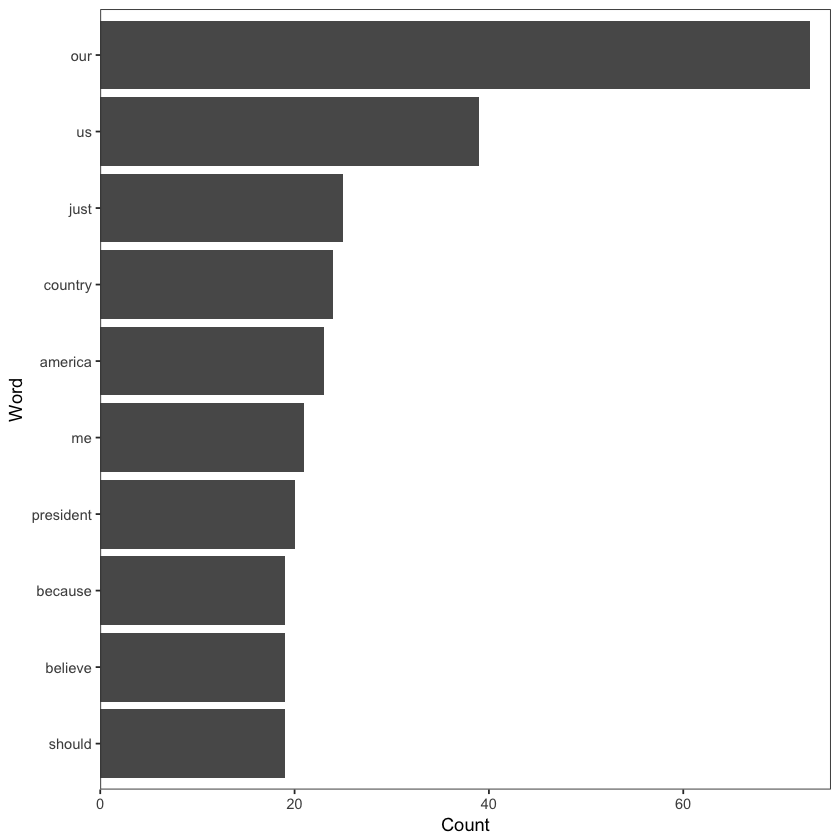

In [61]:
# Hillary Clinton

hillaryFrequency <- processed_dataset[processed_dataset$candidate == "Clinton", ]
hillaryFrequency <- freq_terms(hillaryFrequency$text)

plot(hillaryFrequency[1:10,])

# Word frequency matrix group by speaker

In [62]:
wordFreqMatrix <- wfm(processed_dataset$text, processed_dataset$candidate)
wordFreqMatrix[c(1:5, 350:354), ]

,Clinton,Trump
abandoned,1,1
able,2,2
abroad,1,2
accept,1,1
access,1,1
facts,1,3
failedand,1,0
fair,2,3
fairer,1,0
faith,3,0


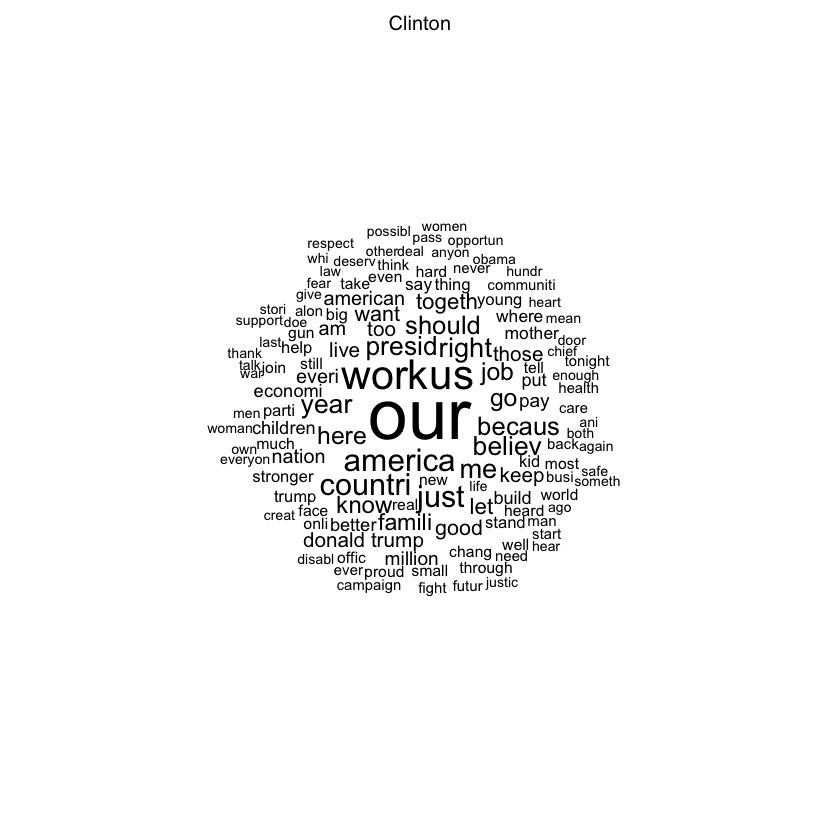

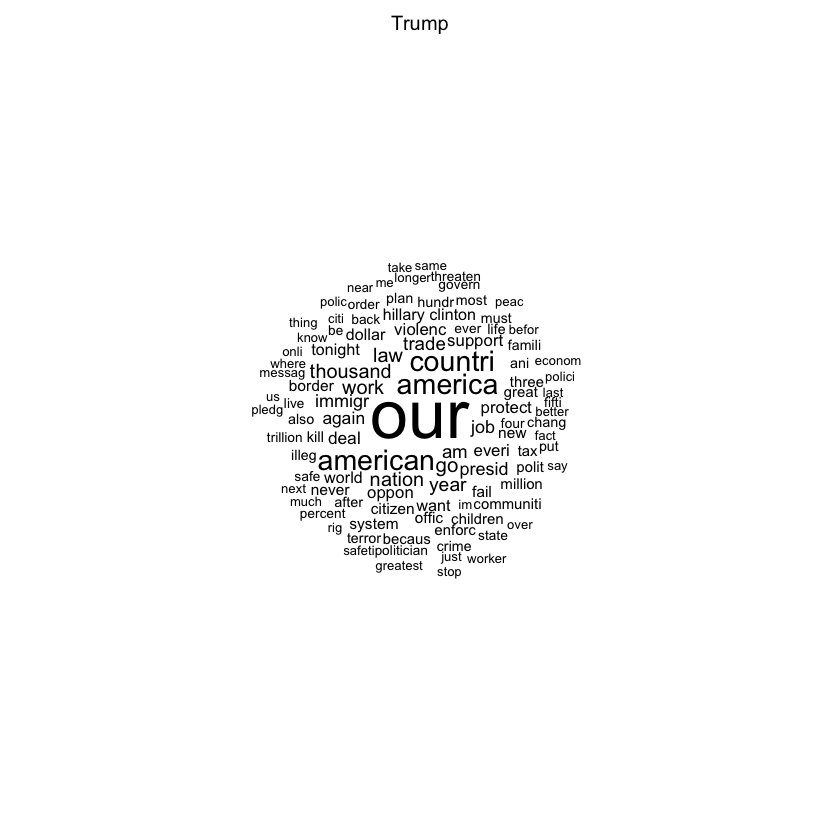

In [63]:
trans_cloud(processed_dataset$text, processed_dataset$candidate, stem = T, min.freq = 5)

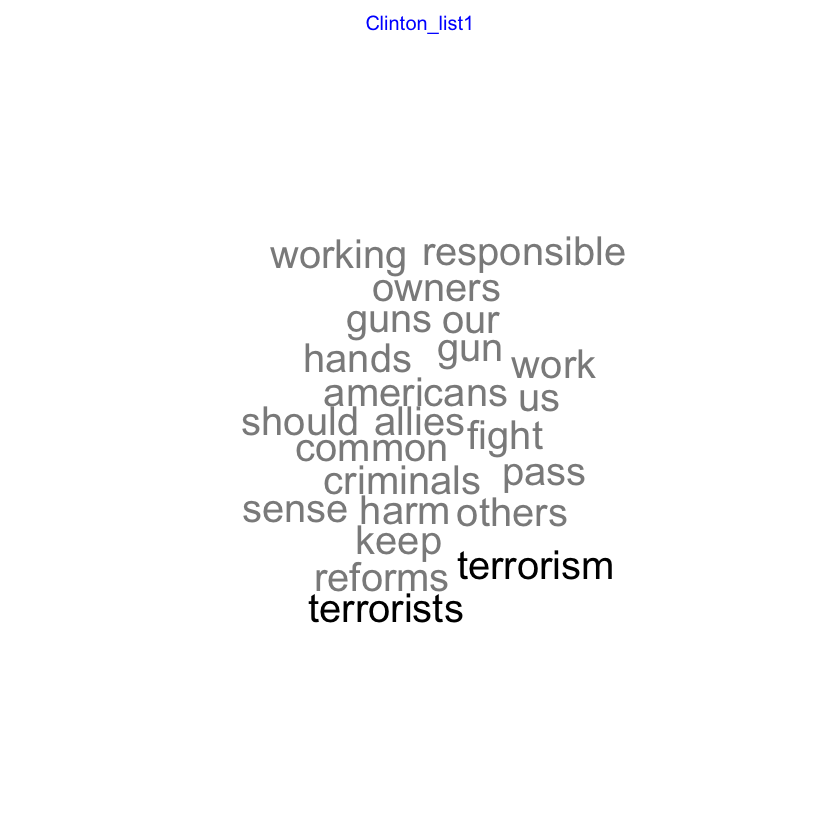


Match Terms

List 1:
terrorism, terrorist, terror, terrorists




   row   group unit text                                                                                                                        
1    6   Trump    6 attacks our police terrorism our cities threaten our very life.                                                             
2   82   Trump   82 plan begin safety home means safe neighborhoods secure borders protection terrorism.                                        
3  114   Trump  114 task our new administration liberate our citizens crime terrorism lawlessness threatens communities.                        
4  133   Trump  133 once again france victim brutal islamic terrorism.                                                                          
5  139   Trump  139 only weeks ago orlando florida forty nine wonderful americans savagely murdered islamic terrorist.                          
6  140   Trump  140 terrorist targeted our lgbt community.                                                                        

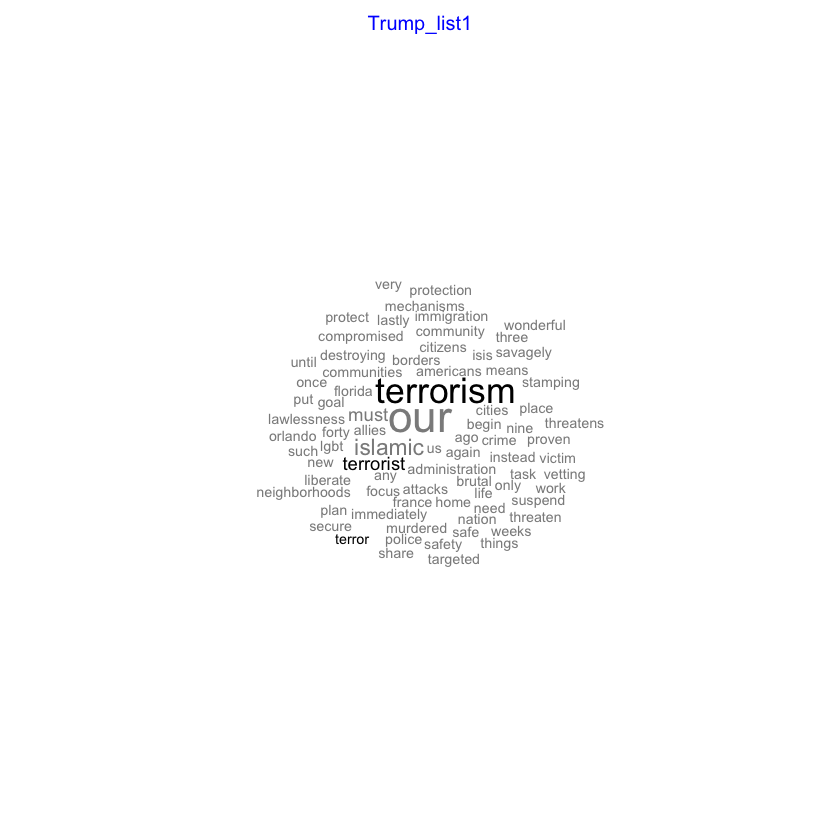

In [64]:
# Word association with 'Terror'
word_associate(processed_dataset$text, processed_dataset$candidate, match.string = "terror", wordcloud = T)

## Building word statistics

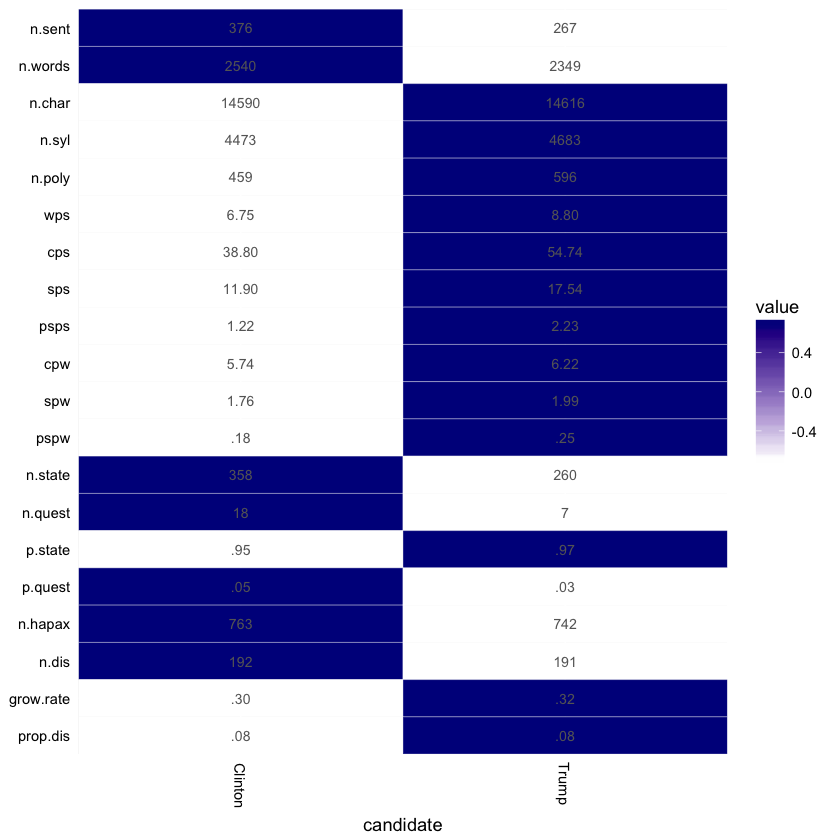

In [65]:
ws <- word_stats(processed_dataset$text, processed_dataset$candidate, rm.incomplete = T)
plot(ws, label = T, lab.digits = 2)

# Applying Qdap's Vignette to tag part of speech

  |======================================================================| 100%


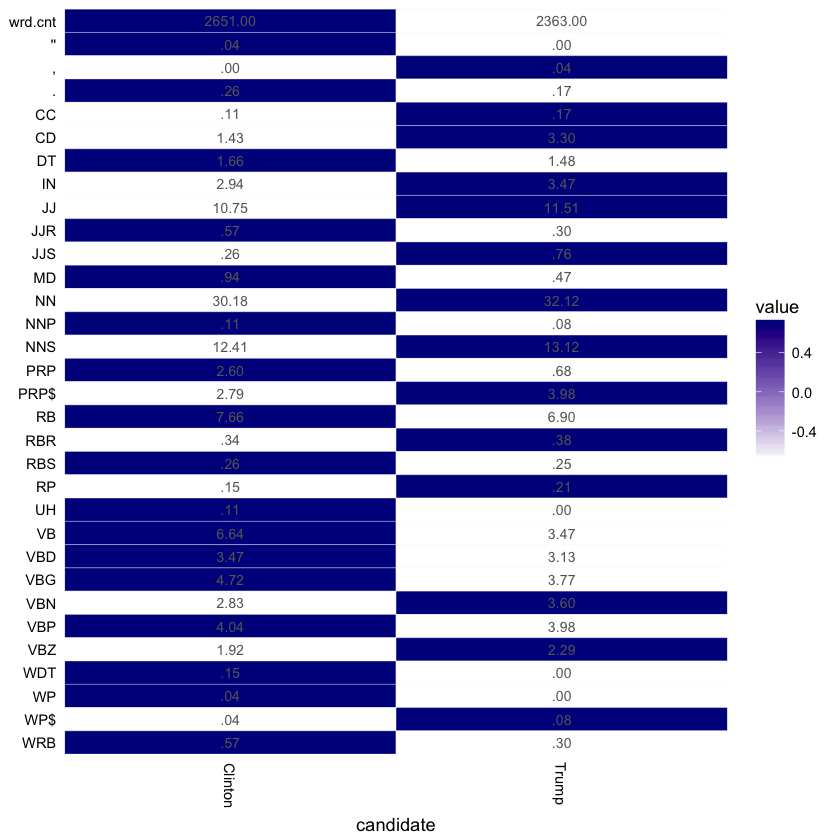

In [66]:
partOfSpeech <- pos_by(processed_dataset$text, grouping.var = processed_dataset$candidate)
plot(partOfSpeech, values = T, digits = 2)

  |======================================================================| 100%


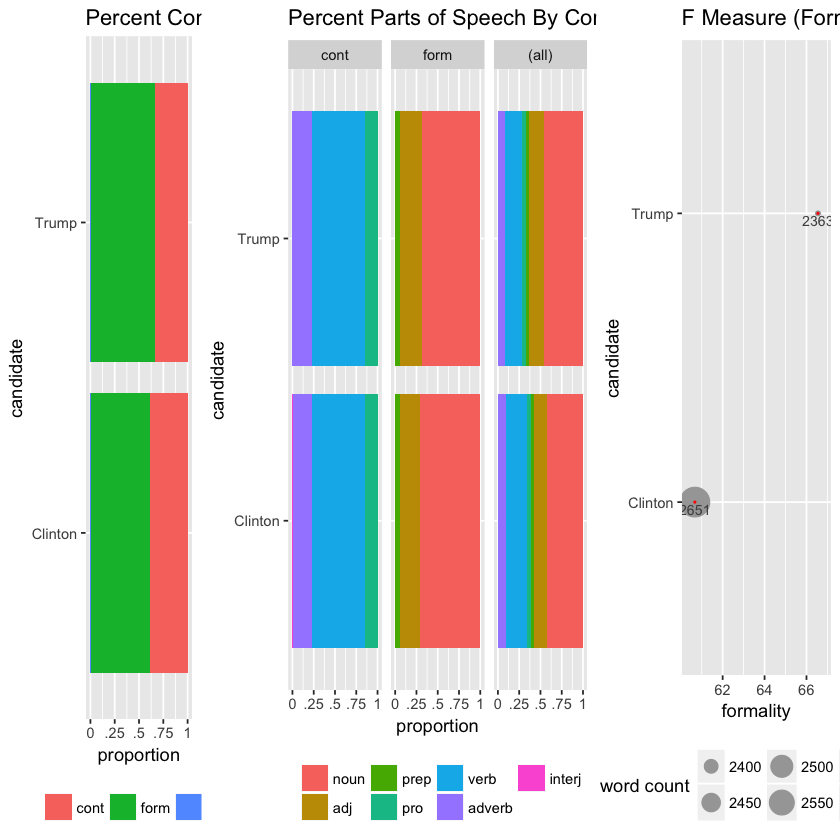

In [67]:
form <- formality(processed_dataset$text, processed_dataset$candidate)
plot(form)

# Sentiment Analysis

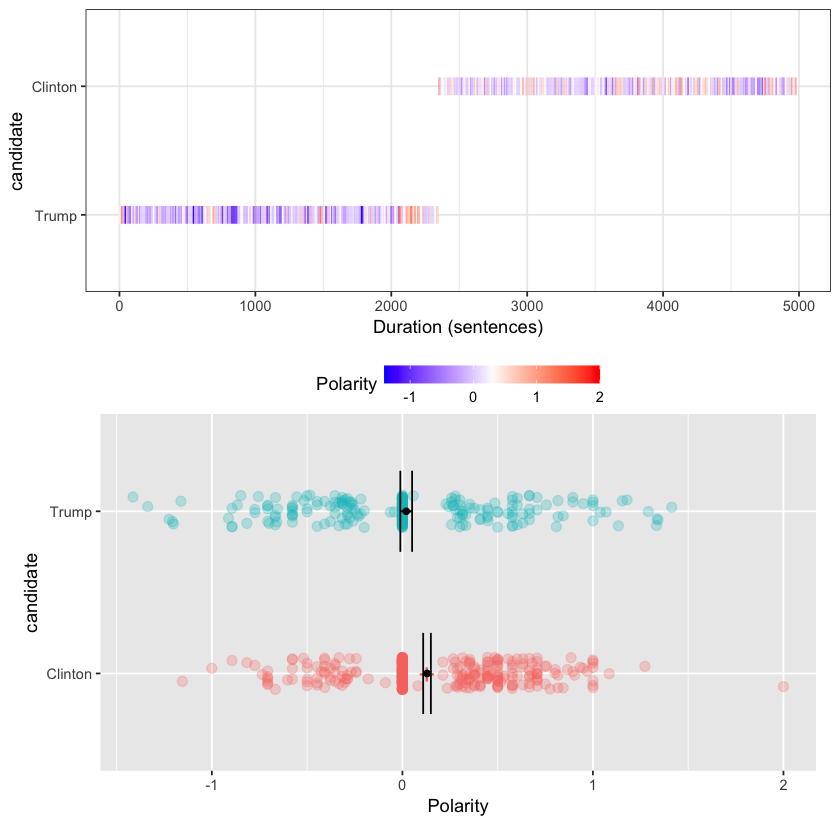

In [68]:
polarity <- polarity(processed_dataset$text, processed_dataset$candidate)
plot(polarity)

# Lexical Dispersion Plot

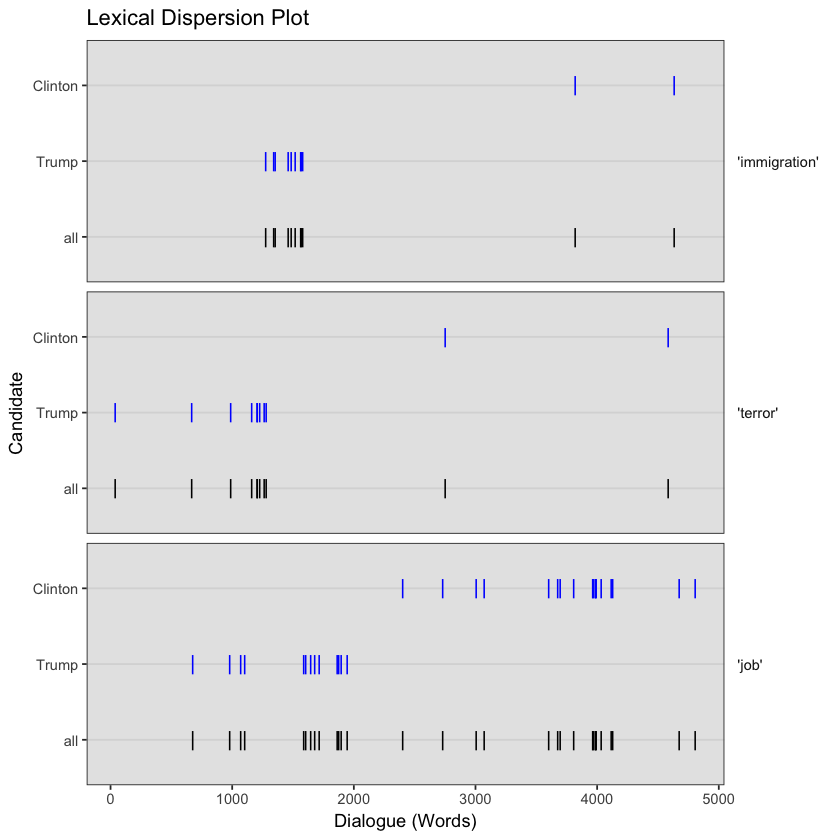

In [69]:
dispersion_plot(processed_dataset$text, c("immigration", "terror", "job", "taz"), processed_dataset$candidate)

# Building gradient wordcloud

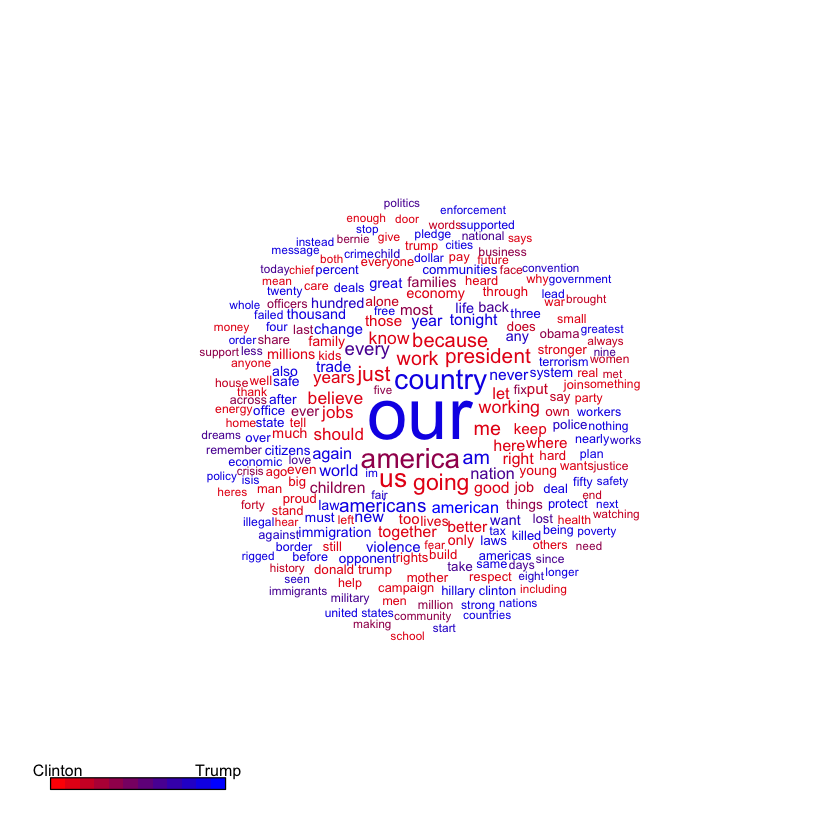

In [70]:
gradient_cloud(processed_dataset$text, processed_dataset$candidate, min.freq = 5, stem = F)